In [1]:
import sys
import os
import pandas as pd
import joblib
# Ruta absoluta a la carpeta src
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Importar funciones
from data.dataset import download_data, load_and_process_dataset
from features.build_features  import build_features
from models.train import train_model
from models.predict import evaluate_f1
from visualization.plots import (
    plot_confusion_matrix,
    plot_probability_histogram,
    plot_feature_importances
)

In [2]:
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet"
output_filename = "yellow_tripdata_2020-01.parquet"
ruta_archivo = download_data(url, output_filename)


Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-01.parquet


In [3]:
raw_path = os.path.join('..', 'data', 'raw', 'yellow_tripdata_2020-01.parquet')
processed_path = os.path.join('..', 'data', 'processed', 'yellow_tripdata_2020-01.parquet')

df = load_and_process_dataset(raw_path, processed_path)
df.head()

Archivo procesado guardado en: ..\data\processed\yellow_tripdata_2020-01.parquet


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,tip_fraction,target,pickup_weekday,pickup_hour,pickup_minute,work_hours,trip_time,trip_speed
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,2.5,None,0.245000,1,2,0,28,0,288.0,0.004167
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,2.5,None,0.214286,1,2,0,35,0,445.0,0.002697
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,2.5,None,0.166667,0,2,0,47,0,371.0,0.001617
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,0.0,None,0.247273,1,2,0,55,0,291.0,0.002749
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,0.0,None,0.000000,0,2,0,1,0,138.0,0.000000


In [4]:
# Ejecuta la función para generar features
X, y = build_features(df)
# Mostrar resultados
print("Features:\n", X.head())
print("Target:\n", y.head())

Features:
    pickup_weekday  pickup_hour  work_hours  pickup_minute  passenger_count  \
0               2            0           0             28              1.0   
1               2            0           0             35              1.0   
2               2            0           0             47              1.0   
3               2            0           0             55              1.0   
4               2            0           0              1              1.0   

   trip_distance  trip_time  trip_speed  PULocationID  DOLocationID  \
0            1.2      288.0    0.004167           238           239   
1            1.2      445.0    0.002697           239           238   
2            0.6      371.0    0.001617           238           238   
3            0.8      291.0    0.002749           238           151   
4            0.0      138.0    0.000000           193           193   

   RatecodeID  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0

In [5]:
# Ruta donde se guardará el modelo
model_output_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'models', 'random_forest_model.joblib'))

# Entrenar el modelo
model = train_model(X, y, model_path=model_output_path)


KeyboardInterrupt: 

In [6]:
# Cargar el modelo previamente entrenado
model_path = r"C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\models\random_forest_model.joblib"
rfc = joblib.load(model_path)
evaluate_f1(model=rfc, X=X, y=y)

Entrada inválida. Usando umbral por defecto = 0.5
F1-score con threshold 0.5:


0.7298440426753037

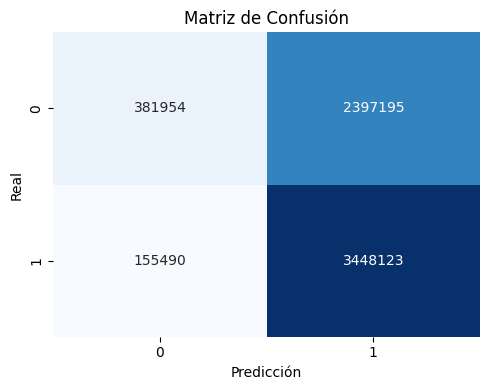

NameError: name 'model' is not defined

In [ ]:
probs = rfc.predict_proba(X)[:, 1]
y_pred = (probs > 0.5).astype(int)  # umbral fijo o dinámico

plot_confusion_matrix(y_true=y, y_pred=y_pred)
plot_probability_histogram(model=rfc, X=X, y_true=y)
feature_names = X.columns 
plot_feature_importances(model=rfc, feature_names=feature_names)

In [9]:
# Define meses a evaluar
months = ["2020-02", "2020-03", "2020-04"]
url_base = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_"

for month in months:
    print(f"\n Evaluando mes: {month}")
    
    # Paso 1: Descargar y guardar raw
    url = f"{url_base}{month}.parquet"
    filename = f"yellow_tripdata_{month}.parquet"
    raw_path = download_data(url, filename)
    
    # Paso 2: Procesar dataset
    processed_path = raw_path.replace("raw", "processed")
    df = load_and_process_dataset(raw_path, processed_path)
    
    # Paso 3: Construir features
    X, y = build_features(df)
    
    # Paso 4: Evaluar
    evaluate_f1(rfc, X, y, threshold=0.5)  # o puedes dejar que el usuario ingrese threshold



 Evaluando mes: 2020-02
Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-02.parquet
Archivo procesado guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\processed\yellow_tripdata_2020-02.parquet
F1-score con threshold 0.5:

 Evaluando mes: 2020-03
Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-03.parquet
Archivo procesado guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\processed\yellow_tripdata_2020-03.parquet
F1-score con threshold 0.5:

 Evaluando mes: 2020-04
Archivo guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\raw\yellow_tripdata_2020-04.parquet
Archivo procesado guardado en: c:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\tip-prediction-nyc\data\processed\yellow_tripdata_2020-04.p